In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from itertools import chain, combinations # itertools

In [ ]:
df = pd.read_csv('http://www.ppgia.pucpr.br/~jean.barddal/datascience/iris.csv')

In [ ]:
df.head(2)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa


In [ ]:
# Criar uma lista com os nomes das features, exceto a coluna target(variety).
TARGET = 'variety'
cols = list(df.columns.values)
cols.remove(TARGET)

In [ ]:
cols

['sepal.length', 'sepal.width', 'petal.length', 'petal.width']

In [ ]:
# powerset -> [1,2,3] -> [], [1], ..., [1,2], ..., [1,2,3]
powerset = lambda ls: chain.from_iterable(combinations(ls, r) for r in range(1, len(ls)+ 1)) 

In [ ]:
combinations_ = list(powerset(cols))

In [ ]:
combinations_

[('sepal.length',),
 ('sepal.width',),
 ('petal.length',),
 ('petal.width',),
 ('sepal.length', 'sepal.width'),
 ('sepal.length', 'petal.length'),
 ('sepal.length', 'petal.width'),
 ('sepal.width', 'petal.length'),
 ('sepal.width', 'petal.width'),
 ('petal.length', 'petal.width'),
 ('sepal.length', 'sepal.width', 'petal.length'),
 ('sepal.length', 'sepal.width', 'petal.width'),
 ('sepal.length', 'petal.length', 'petal.width'),
 ('sepal.width', 'petal.length', 'petal.width'),
 ('sepal.length', 'sepal.width', 'petal.length', 'petal.width')]

In [ ]:
for comb in combinations_:
    cols_selected = list(comb) # gerando lista com as features selecionadas.

    X, y = df[cols_selected], df[TARGET] # conjuntos X e y.
    
    loo = LeaveOneOut() # leave-one-out
    accs_dt, accs_nn = [], [] # listas para armazenar txs de acerto.
    for train_index, test_index in loo.split(X):
        # definindo conjuntos de treino e teste.
        X_train, y_train = X.loc[train_index], y.loc[train_index] 
        X_test, y_test = X.loc[test_index], y.loc[test_index]

        # treinamento dos classificadores.
        nn = KNeighborsClassifier(1, algorithm='brute')
        dt = DecisionTreeClassifier(criterion='entropy',
                                    min_samples_split=2,
                                    min_impurity_decrease=0.25)
        
        nn.fit(X_train, y_train)
        dt.fit(X_train, y_train)

        # teste dos classificadores no conjunto de teste
        y_pred_nn = nn.predict(X_test)
        y_pred_dt = dt.predict(X_test)

        # armazenar as txs de acerto nas listas.
        accs_dt.append(accuracy_score(y_test, y_pred_dt))
        accs_nn.append(accuracy_score(y_test, y_pred_nn))
    
    # acabando o leave--one-out, vamos apresentar a tx de acerto média por combinação.
    print('-' * 30)
    print(f' Features usadas = {cols_selected}')
    print(f'\t DT: {100.0 * sum(accs_dt)/len(accs_dt)}%')
    print(f'\t NN: {100.0 * sum(accs_nn)/len(accs_nn)}%')


------------------------------
 Features usadas = ['sepal.length']
	 DT: 62.666666666666664%
	 NN: 58.666666666666664%
------------------------------
 Features usadas = ['sepal.width']
	 DT: 52.666666666666664%
	 NN: 48.0%
------------------------------
 Features usadas = ['petal.length']
	 DT: 94.0%
	 NN: 88.0%
------------------------------
 Features usadas = ['petal.width']
	 DT: 95.33333333333333%
	 NN: 88.0%
------------------------------
 Features usadas = ['sepal.length', 'sepal.width']
	 DT: 62.666666666666664%
	 NN: 70.0%
------------------------------
 Features usadas = ['sepal.length', 'petal.length']
	 DT: 94.0%
	 NN: 91.33333333333333%
------------------------------
 Features usadas = ['sepal.length', 'petal.width']
	 DT: 95.33333333333333%
	 NN: 92.66666666666667%
------------------------------
 Features usadas = ['sepal.width', 'petal.length']
	 DT: 94.0%
	 NN: 92.0%
------------------------------
 Features usadas = ['sepal.width', 'petal.width']
	 DT: 95.33333333333333%

### Wrapper RFE

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

In [ ]:
X, y = df[cols], df[TARGET]  

In [ ]:
# criar os classificadores
dt = DecisionTreeClassifier(criterion='gini', random_state=42)
lr = LogisticRegression(max_iter=1000)

In [ ]:
# processo de validação:
loo = LeaveOneOut()

In [ ]:
# seletores de features
rfe_dt = RFECV(estimator=dt, cv=loo, scoring='accuracy')
rfe_lr = RFECV(estimator=lr, cv=loo, scoring='accuracy')

In [ ]:
rfe_dt.fit(X, y)
rfe_lr.fit(X, y)
''

''

In [ ]:
print('--- DT ---')
print('\t Suporte: ')
print(rfe_dt.support_)
print('\t Ranking: ')
print(rfe_dt.ranking_)

--- DT ---
	 Suporte: 
[ True False  True  True]
	 Ranking: 
[1 2 1 1]


In [ ]:
print('--- LR ---')
print('\t Suporte: ')
print(rfe_lr.support_)
print('\t Ranking: ')
print(rfe_lr.ranking_)

--- LR ---
	 Suporte: 
[False  True  True  True]
	 Ranking: 
[2 1 1 1]


### SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
skb = SelectKBest(k='all')
skb.fit(X, y)

SelectKBest(k='all', score_func=<function f_classif at 0x7f8d3e73e840>)

In [ ]:
importances = skb.scores_

In [ ]:
importances

array([ 119.26450218,   49.16004009, 1180.16118225,  960.0071468 ])

In [ ]:
importances = pd.Series(data=importances, index=X.columns.values)

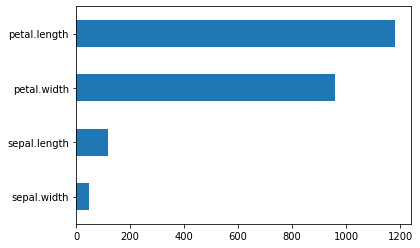

In [ ]:
importances.sort_values().plot(kind='barh')

### Feature Selection com Decision Trees

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
dt.feature_importances_

array([0.01333333, 0.        , 0.56405596, 0.42261071])

In [ ]:
importances = dt.feature_importances_
importances = pd.Series(data=importances, index=X.columns.values)

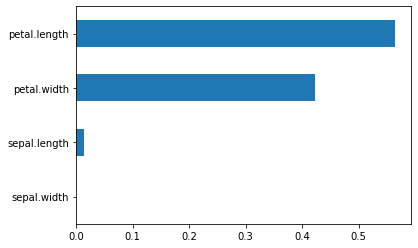

In [ ]:
importances.sort_values().plot(kind='barh')

[Text(464.99999999999994, 830.5, 'petal.length <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = Setosa'),
 Text(393.46153846153845, 679.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = Setosa'),
 Text(536.5384615384615, 679.5, 'petal.width <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = Versicolor'),
 Text(286.15384615384613, 528.5, 'petal.length <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = Versicolor'),
 Text(143.07692307692307, 377.5, 'petal.width <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = Versicolor'),
 Text(71.53846153846153, 226.5, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = Versicolor'),
 Text(214.61538461538458, 226.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Virginica'),
 Text(429.23076923076917, 377.5, 'petal.width <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = Virginica'),
 Text(357.6923076923077, 226.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\ncla

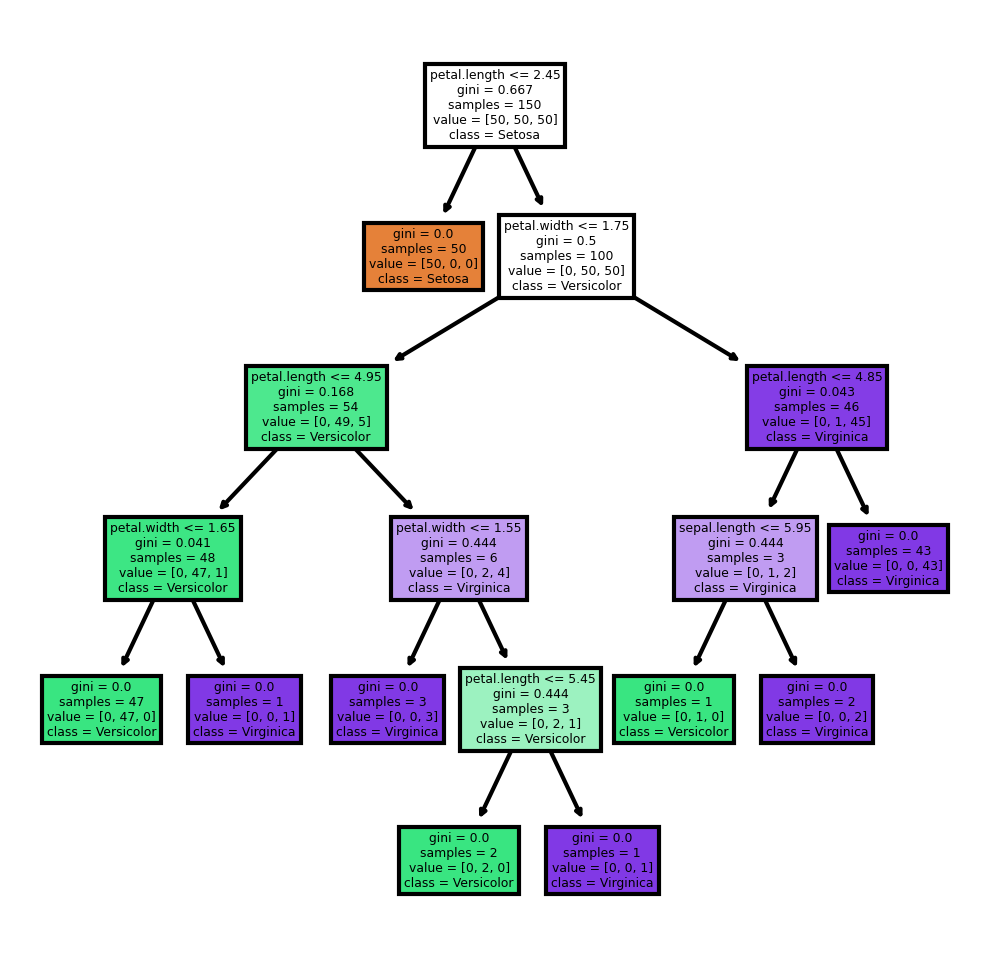

In [ ]:
from sklearn import tree
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=300)
tree.plot_tree(dt, feature_names=X.columns.values, class_names=y.unique(), filled=True)

### Over e undersampling

In [ ]:
!pip install imblearn

In [ ]:
df = pd.read_csv('http://www.ppgia.pucpr.br/~jean.barddal/datascience/imbalanced.csv')

In [ ]:
df

,attrib1,attrib2,attrib3,class
0,1.595781,5.540723,9.109505,groupA
1,2.657896,1.166703,1.368305,groupA
2,0.901466,4.374227,3.207844,groupA
3,1.396138,5.965788,9.472602,groupA
4,7.308782,4.100808,2.077148,groupB
...,...,...,...,...
995,3.242999,9.220860,2.896887,groupB
996,7.288296,2.191462,7.232975,groupA
997,8.130862,7.725250,2.940666,groupB
998,5.107497,3.262376,5.485940,groupA


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


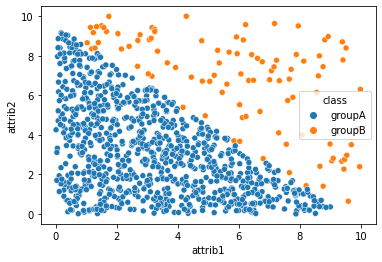

In [ ]:
sns.scatterplot(df['attrib1'], df['attrib2'], hue=df['class'])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X, y = df.drop('class', axis=1), df['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
lr = LogisticRegression(max_iter=1000)

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(accuracy_score(y_test, lr.predict(X_test)))

0.9757575757575757


In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

In [ ]:
samplers = {'RO': RandomOverSampler(), 'SMOTE': SMOTE(),
            'RU': RandomUnderSampler(), 'NM1': NearMiss(version=1),
            'NM2': NearMiss(version=2), 'NM3': NearMiss(version=3)} 

In [ ]:
for nome_sampler, sampler in samplers.items():
    X_train_sampled, y_train_sampled = sampler.fit_resample(X_train, y_train)
    lr = LogisticRegression(max_iter=1000)
    lr.fit(X_train_sampled, y_train_sampled)
    acc = accuracy_score(y_test, lr.predict(X_test))

    print(f'{nome_sampler} \t {100.0 * acc}%')


RO 	 98.7878787878788%
SMOTE 	 98.18181818181819%
RU 	 97.87878787878788%
NM1 	 97.57575757575758%
NM2 	 98.18181818181819%
NM3 	 97.87878787878788%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni